### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.ticker as ticker
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/virat-kholi-testodit20-stat/final (1).csv


### Dataset Reading

In [2]:
df = pd.read_csv('/kaggle/input/virat-kholi-testodit20-stat/final (1).csv')

In [3]:
df

,index,runs,opponent,ground,date,match,Match_No,total
0,0,12,SriLanka,Dambulla,18Aug2008,ODI,1,12
1,1,37,SriLanka,Dambulla,20Aug2008,ODI,2,49
2,2,25,SriLanka,Colombo(RPS),24Aug2008,ODI,3,74
3,3,54,SriLanka,Colombo(RPS),27Aug2008,ODI,4,128
4,4,31,SriLanka,Colombo(RPS),29Aug2008,ODI,5,159
...,...,...,...,...,...,...,...,...
511,535,11,England,Birmingham,1Jul2022,Test,512,23661
512,536,20,England,Birmingham,1Jul2022,Test,513,23681
513,537,1,England,Birmingham,9Jul2022,T20,514,23682
514,538,11,England,Nottingham,10Jul2022,T20,515,23693


In [4]:
df.shape

(516, 8)

In [5]:
df.columns

Index(['index', 'runs', 'opponent', 'ground', 'date', 'match', 'Match_No',
       'total'],
      dtype='object')

In [6]:
df.head()

,index,runs,opponent,ground,date,match,Match_No,total
0,0,12,SriLanka,Dambulla,18Aug2008,ODI,1,12
1,1,37,SriLanka,Dambulla,20Aug2008,ODI,2,49
2,2,25,SriLanka,Colombo(RPS),24Aug2008,ODI,3,74
3,3,54,SriLanka,Colombo(RPS),27Aug2008,ODI,4,128
4,4,31,SriLanka,Colombo(RPS),29Aug2008,ODI,5,159


In [7]:
df.tail()

,index,runs,opponent,ground,date,match,Match_No,total
511,535,11,England,Birmingham,1Jul2022,Test,512,23661
512,536,20,England,Birmingham,1Jul2022,Test,513,23681
513,537,1,England,Birmingham,9Jul2022,T20,514,23682
514,538,11,England,Nottingham,10Jul2022,T20,515,23693
515,539,16,England,Lord's,14Jul2022,ODI,516,23709


In [8]:
df.sample(5)

,index,runs,opponent,ground,date,match,Match_No,total
40,44,22,SouthAfrica,Johannesburg,15Jan2011,ODI,41,1609
348,364,213,SriLanka,Nagpur,24Nov2017,Test,349,15961
316,332,5,Pakistan,TheOval,18Jun2017,ODI,317,14219
490,512,44,England,TheOval,2Sep2021,Test,491,23093
299,315,122,England,Pune,15Jan2017,ODI,300,13558


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     516 non-null    int64 
 1   runs      516 non-null    int64 
 2   opponent  516 non-null    object
 3   ground    516 non-null    object
 4   date      516 non-null    object
 5   match     516 non-null    object
 6   Match_No  516 non-null    int64 
 7   total     516 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 32.4+ KB


In [10]:
df.describe()

,index,runs,Match_No,total
count,516.000000,516.000000,516.000000,516.000000
mean,270.118217,45.947674,258.500000,11681.726744
std,155.219618,44.584372,149.100637,7301.114849
min,0.000000,0.000000,1.000000,12.000000
25%,134.750000,11.000000,129.750000,5328.250000
50%,270.500000,32.500000,258.500000,10886.500000
75%,403.250000,70.250000,387.250000,18535.750000
max,539.000000,254.000000,516.000000,23709.000000


### Data Cleaning & Preprocessing

In [11]:
df.duplicated().sum()

0

There is no duplicate value present

In [12]:
df.isna().sum()

index       0
runs        0
opponent    0
ground      0
date        0
match       0
Match_No    0
total       0
dtype: int64

Good to see that this dataset is not having any null value present

In [13]:
nums = [num for num in range(516)]
indexes = pd.Series(df['index']).tolist()
missing_indexes = [index for index in nums if index not in indexes]
print(missing_indexes, end=" ")

[7, 14, 21, 28, 68, 109, 145, 164, 165, 170, 180, 197, 266, 282, 293, 295, 401, 408, 442, 463, 493, 506, 515] 

'index' field seems not useful here so let's drop it

In [14]:
df.drop(columns=['index'], inplace = True)

Renaming the fields

In [15]:
df.rename(columns={'match': 'format', 'Match_No': 'match'}, inplace=True)

Let's add 'match' at starting

In [16]:
match_column = df.pop('match')
df.insert(0, 'match', match_column)

Let's extract day, month and year from 'date' field

In [17]:
date_parts = df['date'].str.split('(\d{1,2})([A-Za-z]+)(\d{4})', expand=True)
df['day'] = date_parts[1].astype(int)
df['month'] = pd.to_datetime(date_parts[2], format='%b').dt.month
df['year'] = date_parts[3].astype(int)

In [18]:
df.ground.nunique()

73

In [19]:
df.ground.unique()

array(['Dambulla', 'Colombo(RPS)', 'Centurion', 'Johannesburg',
       'Vadodara', 'Mohali', 'Rajkot', 'Nagpur', 'Kolkata', 'Mirpur',
       'Jaipur', 'Ahmedabad', 'Bulawayo', 'Harare', 'Visakhapatnam',
       'Guwahati', 'Bengaluru', 'Chennai', 'Durban', 'CapeTown',
       'Gqeberha', 'Delhi', 'Wankhede', 'PortofSpain', 'NorthSound',
       'Kingston', 'Bridgetown', 'Roseau', 'Manchester',
       'Chester-le-Street', 'Southampton', 'TheOval', "Lord's", 'Cardiff',
       'Hyderabad(Deccan)', 'Cuttack', 'Indore', 'Melbourne', 'Sydney',
       'Perth', 'Adelaide', 'Brisbane', 'Hobart', 'Hambantota',
       'Pallekele', 'Pune', 'Kochi', 'Ranchi', 'Dharamsala', 'Birmingham',
       'Kanpur', 'Napier', 'Hamilton', 'Auckland', 'Wellington',
       'Fatullah', 'Nottingham', 'Leeds', 'Galle', 'Colombo(PSS)',
       'Colombo(SSC)', 'Canberra', 'GrosIslet', 'Lauderhill',
       'Thiruvananthapuram', 'Dublin(Malahide)', 'Bristol', 'Brabourne',
       'MountMaunganui', 'Providence', 'Christchurch'

Let's add country Name based on ground Location

In [20]:
grounds_all = pd.Series(df['ground'].unique()).tolist()

In [21]:
Sri_Lanka= ['Dambulla', 'Colombo(RPS)', 'Galle', 'Colombo(PSS)', 'Colombo(SSC)', 'Hambantota', 'Pallekele']
India= ['Vadodara', 'Mohali', 'Rajkot', 'Nagpur', 'Kolkata', 'Jaipur', 'Ahmedabad', 'Visakhapatnam', 'Guwahati', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad(Deccan)', 'Cuttack', 'Indore', 'Kochi', 'Ranchi', 'Dharamsala', 'Pune', 'Kanpur', 'Wankhede', 'Thiruvananthapuram', 'Brabourne']
Bangladesh= ['Mirpur', 'Fatullah']
South_Africa= ['Centurion', 'Johannesburg', 'Durban', 'CapeTown', 'Gqeberha','Paarl']
Zimbabwe= ['Bulawayo', 'Harare']
West_Indies= ['PortofSpain', 'NorthSound', 'Kingston', 'Bridgetown', 'Roseau', 'GrosIslet', 'Lauderhill', 'Providence']
England= ['Manchester', 'Chester-le-Street', 'Southampton', 'TheOval', "Lord's", 'Cardiff', 'Bristol', 'Birmingham', 'Nottingham', 'Leeds']
New_Zealand= ['Napier', 'Hamilton', 'Auckland', 'Wellington', 'MountMaunganui', 'Christchurch']
Australia= ['Melbourne', 'Sydney', 'Perth', 'Adelaide', 'Brisbane', 'Hobart', 'Canberra']
UAE= ['Dubai(DSC)']
Ireland= ['Dublin(Malahide)']
total_grounds = Sri_Lanka + India + Bangladesh + South_Africa + Zimbabwe + West_Indies + England + New_Zealand + Australia  + UAE + Ireland
len(total_grounds)

73

In [22]:
ground_to_country = {
    'Sri Lanka': ['Dambulla', 'Colombo(RPS)', 'Galle', 'Colombo(PSS)', 'Colombo(SSC)', 'Hambantota', 'Pallekele'],
    'India': ['Vadodara', 'Mohali', 'Rajkot', 'Nagpur', 'Kolkata', 'Jaipur', 'Ahmedabad', 'Visakhapatnam', 'Guwahati', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad(Deccan)', 'Cuttack', 'Indore', 'Kochi', 'Ranchi', 'Dharamsala', 'Pune', 'Kanpur', 'Wankhede', 'Thiruvananthapuram', 'Brabourne'],
    'Bangladesh': ['Mirpur', 'Fatullah'],
    'South Africa': ['Centurion', 'Johannesburg', 'Durban', 'CapeTown', 'Gqeberha','Paarl'],
    'Zimbabwe': ['Bulawayo', 'Harare'],
    'West Indies': ['PortofSpain', 'NorthSound', 'Kingston', 'Bridgetown', 'Roseau', 'GrosIslet', 'Lauderhill', 'Providence'],
    'England': ['Manchester', 'Chester-le-Street', 'Southampton', 'TheOval', "Lord's", 'Cardiff', 'Bristol', 'Birmingham', 'Nottingham', 'Leeds'],
    'New Zealand': ['Napier', 'Hamilton', 'Auckland', 'Wellington', 'MountMaunganui', 'Christchurch'],
    'Australia': ['Melbourne', 'Sydney', 'Perth', 'Adelaide', 'Brisbane', 'Hobart', 'Canberra'],
    'UAE': ['Dubai(DSC)'],
    'Ireland': ['Dublin(Malahide)']
}

In [23]:
def get_country(ground):
    for country, grounds in ground_to_country.items():
        if ground in grounds:
            return country
    return None

df['country'] = df['ground'].apply(get_country)

In [24]:
df['country'].value_counts()

India           207
England          70
Australia        64
Sri Lanka        40
West Indies      36
South Africa     35
Bangladesh       26
New Zealand      25
Zimbabwe          8
UAE               3
Ireland           2
Name: country, dtype: int64

Let's add a column called 'Venue' based on ground location

In [25]:
df['venue'] = df['country'].apply(lambda x: 'Home' if x == 'India' else 'Away')
df['venue'].value_counts()

Away    309
Home    207
Name: venue, dtype: int64

### Analysis

#### Total Matches

In [26]:
total_matches = df['match'].max()
total_matches

516

#### Total Runs

In [27]:
total_runs = df['runs'].sum()
total_runs

23709

#### Total 0 (Duck)

In [28]:
ducks = df[df['runs'] == 0]['match'].count()
ducks

32

#### Total 50

In [29]:
fifties = df[df['runs'] >= 50]['match'].count()
fifties

192

#### Total 100

In [30]:
hundreds  = df[df['runs'] >= 100]['match'].count()
hundreds

70

#### Total 150

In [31]:
hundredNdFifty  = df[df['runs'] >= 150]['match'].count()
hundredNdFifty

14

#### Total 200

In [32]:
twoHundreds  = df[df['runs'] >= 200]['match'].count()
twoHundreds

7

#### Distribution of runs

Text(0.5, 1.0, 'Distribution of Runs')

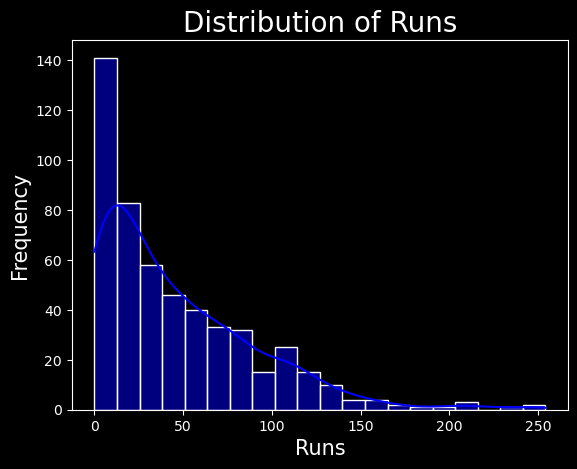

In [33]:
ax = sns.histplot(data=df, x='runs', bins=20, kde=True, color='blue')
plt.xlabel('Runs', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of Runs', fontsize=20)

#### Number of Matches Against All Opponents

In [34]:
df['opponent'].value_counts().head()

England        103
Australia       95
WestIndies      73
SriLanka        70
SouthAfrica     61
Name: opponent, dtype: int64

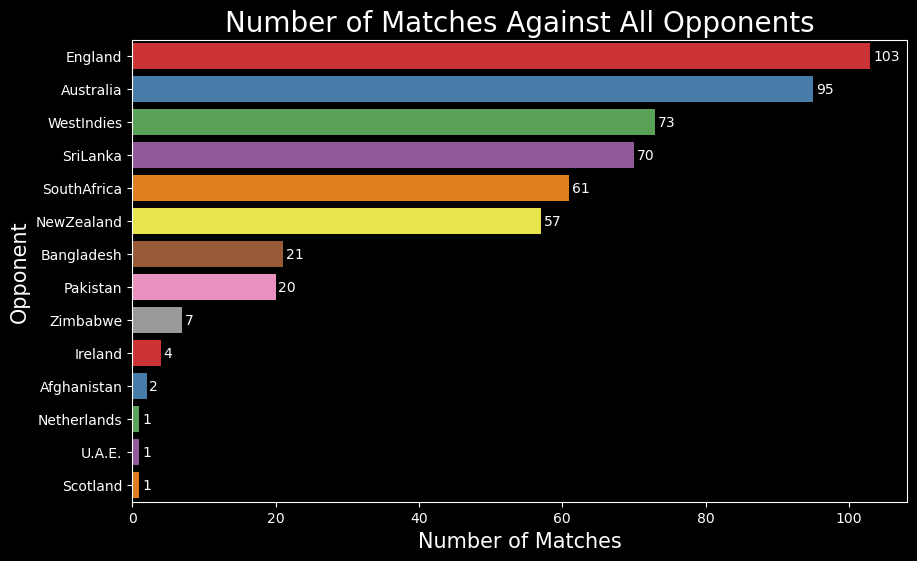

In [35]:
order = df['opponent'].value_counts().index
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='opponent', order=order, palette = 'Set1')
plt.ylabel('Opponent', fontsize=15)
plt.xlabel('Number of Matches', fontsize=15)
plt.title('Number of Matches Against All Opponents', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Number of Matches Against All Opponents Home/Away

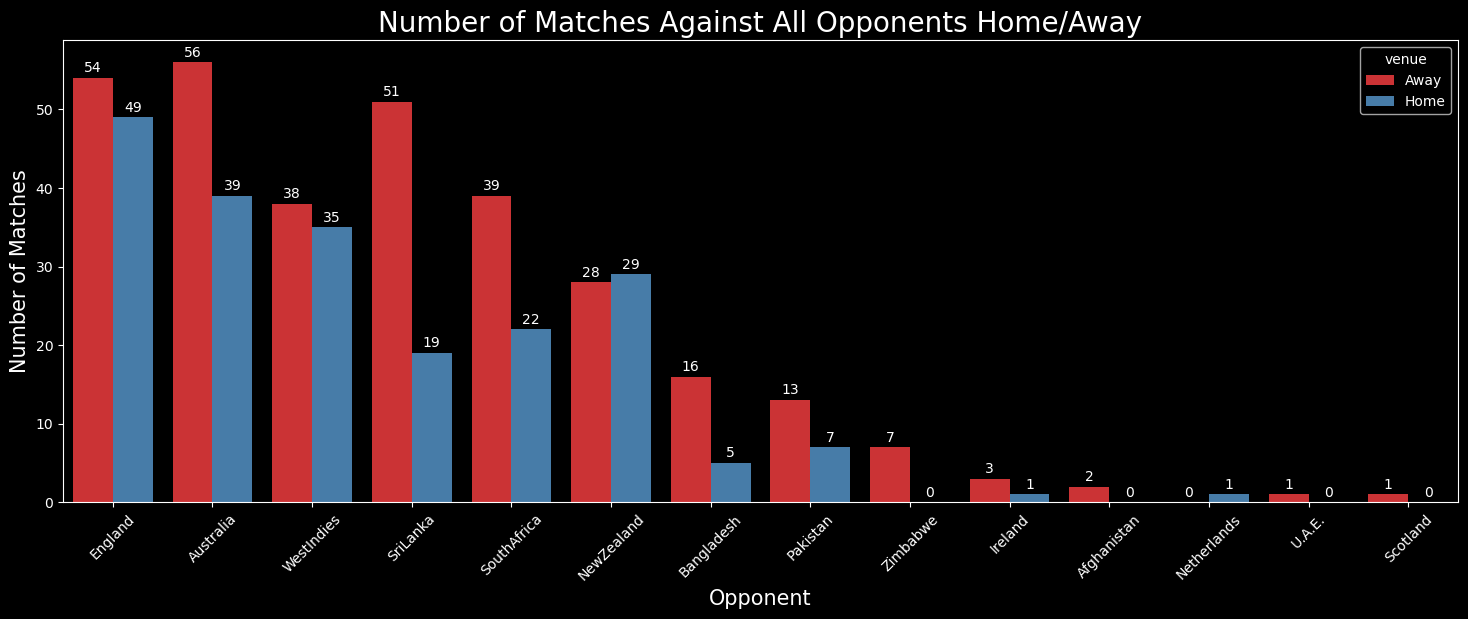

In [36]:
order = df['opponent'].value_counts().index
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, x='opponent', order=order, palette = 'Set1', hue='venue')
plt.xlabel('Opponent', fontsize=15)
plt.ylabel('Number of Matches', fontsize=15)
plt.title('Number of Matches Against All Opponents Home/Away', fontsize=20)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Total Runs scored against Each opponent

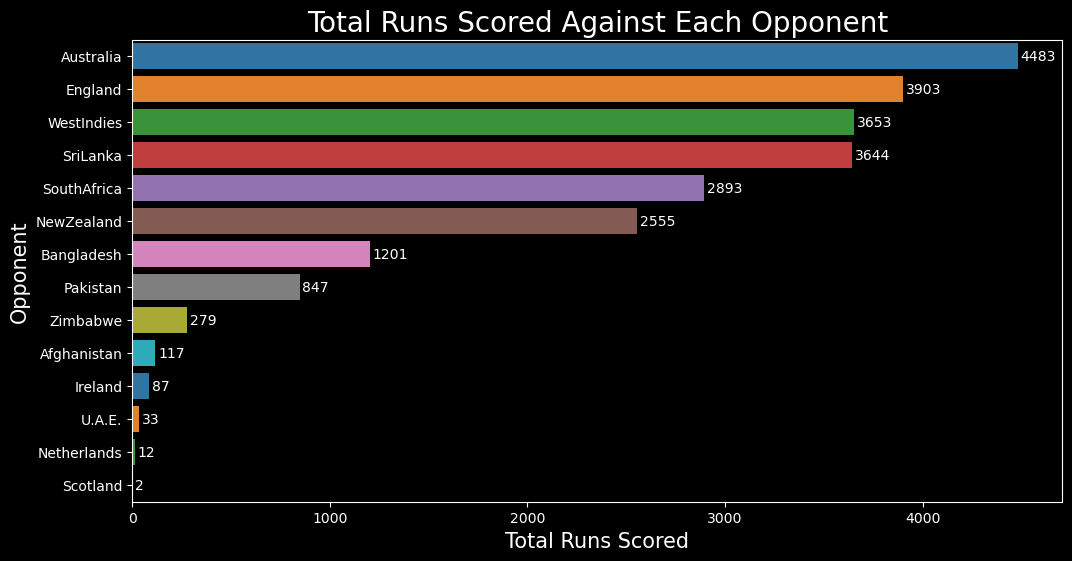

In [37]:
total_runs_by_opponent = df.groupby('opponent')['runs'].sum().reset_index()
total_runs_by_opponent = total_runs_by_opponent.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y='opponent', x='runs', data=total_runs_by_opponent, palette='tab10')
plt.ylabel('Opponent', fontsize=15)
plt.xlabel('Total Runs Scored', fontsize=15)
plt.title('Total Runs Scored Against Each Opponent', fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Total Runs Scored Against Each Opponent Home/Away

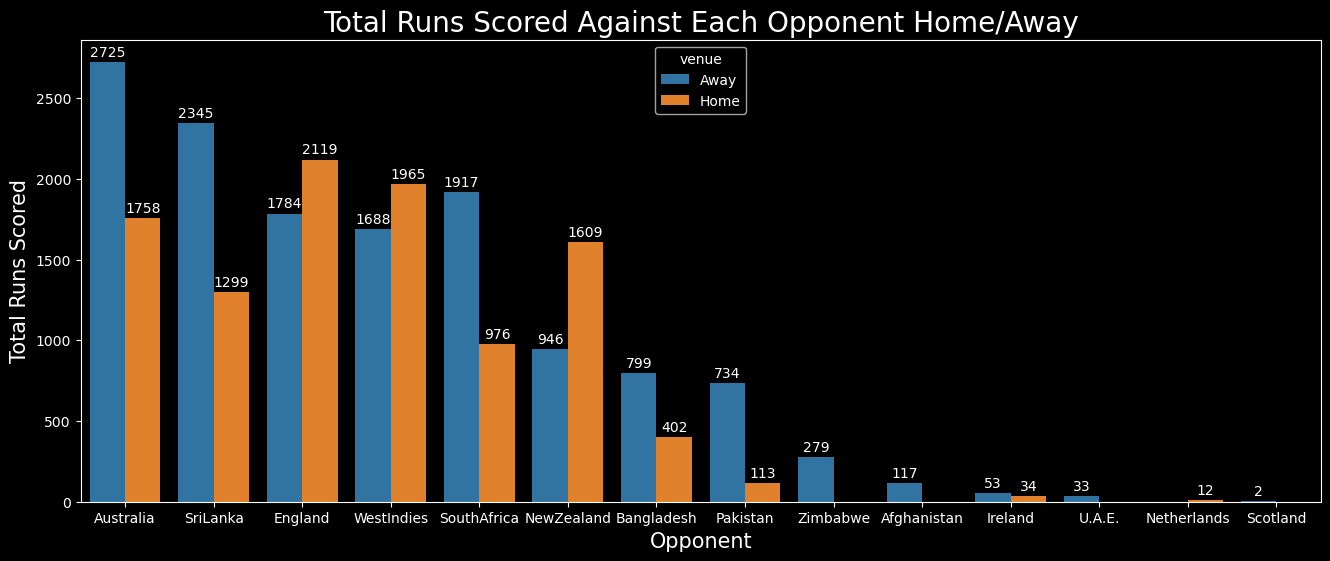

In [38]:
total_runs_by_opponent = df.groupby(['opponent', 'venue'])['runs'].sum().reset_index()
total_runs_by_opponent = total_runs_by_opponent.sort_values(by='runs', ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x='opponent', y='runs', data=total_runs_by_opponent, palette='tab10', hue='venue')
plt.xlabel('Opponent', fontsize=15)
plt.ylabel('Total Runs Scored', fontsize=15)
plt.title('Total Runs Scored Against Each Opponent Home/Away', fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Highest Runs Scored Against Each Opponent

In [39]:
top_runs_vs = df.groupby('opponent')['runs'].max().reset_index()

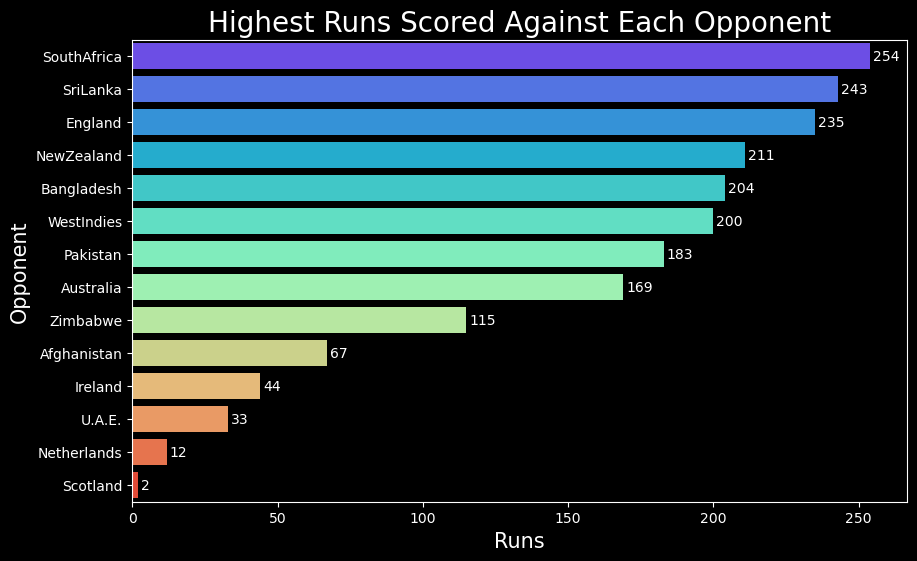

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='opponent', x='runs', data=top_runs_vs, palette='rainbow', order=top_runs_vs.sort_values(by='runs', ascending=False)['opponent'])
plt.ylabel('Opponent', fontsize = 15)
plt.xlabel('Runs', fontsize = 15)
plt.title('Highest Runs Scored Against Each Opponent', fontsize = 20)

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', padding=2)

#### Number of Matches in All Formats

In [41]:
df['format'].value_counts()

ODI     252
Test    173
T20      91
Name: format, dtype: int64

(-1.0999989598648239,
 1.0999972405769078,
 -1.0999997236780448,
 1.0999965013952706)

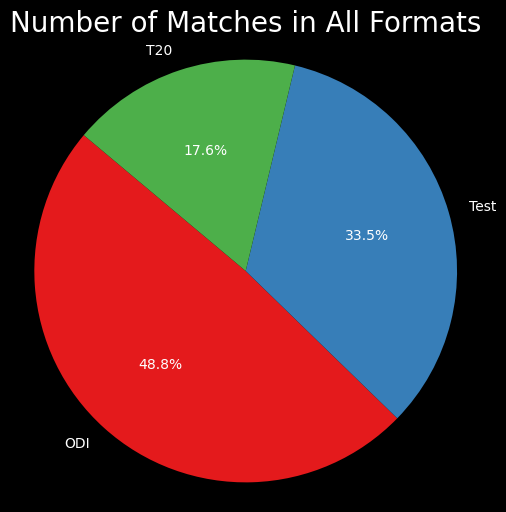

In [42]:
format_counts = df['format'].value_counts()
order = format_counts.index
plt.figure(figsize=(6, 6))
plt.pie(format_counts, labels=order, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1', n_colors=len(format_counts)))
plt.title('Number of Matches in All Formats', fontsize=20)
plt.axis('equal')

Virat Kohli has played almost 49% of the ODI matches across the all formats

(-1.0999996393413405,
 1.0999994213884177,
 -1.0999993088770745,
 1.0999975310606236)

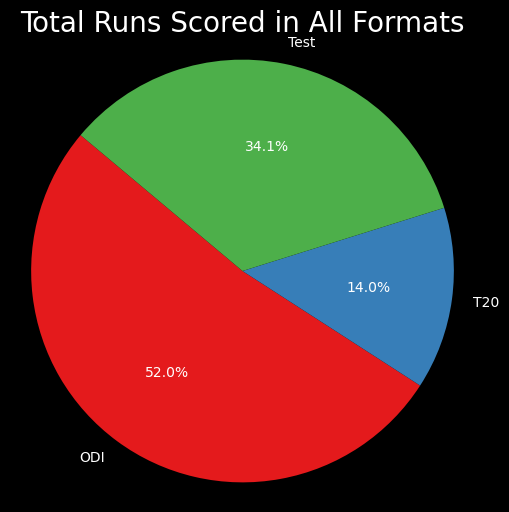

In [43]:
total_runs_by_format = df.groupby('format')['runs'].sum()
order = total_runs_by_format.index
plt.figure(figsize=(6, 6))
plt.pie(total_runs_by_format, labels=order, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1', n_colors=len(order)))
plt.title('Total Runs Scored in All Formats', fontsize=20)
plt.axis('equal')

#### Number of Matches in each Month

In [44]:
df['month'].value_counts().head()

1     75
12    61
2     58
8     57
3     51
Name: month, dtype: int64

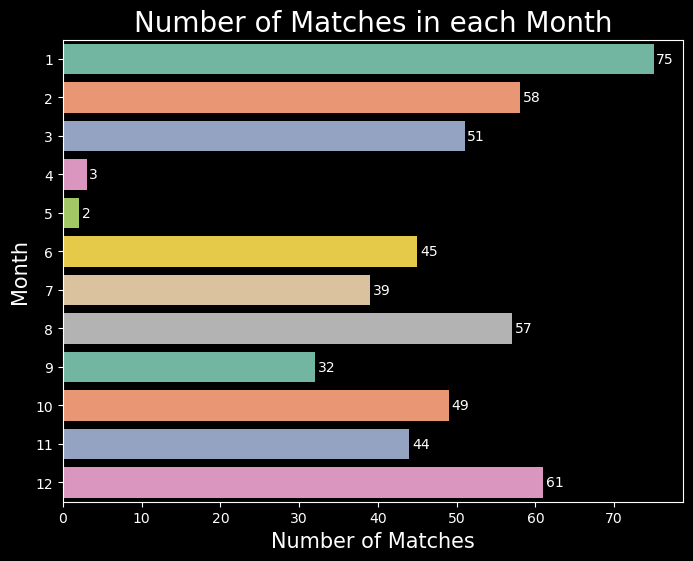

In [45]:
order = df['month'].value_counts().sort_index().index
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, y='month', order=order, palette = 'Set2')
plt.ylabel('Month', fontsize=15)
plt.xlabel('Number of Matches', fontsize=15)
plt.title('Number of Matches in each Month', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

Here we can see that there is very less matches in month of April and May as we know that in these months all Indian players participate in IPL

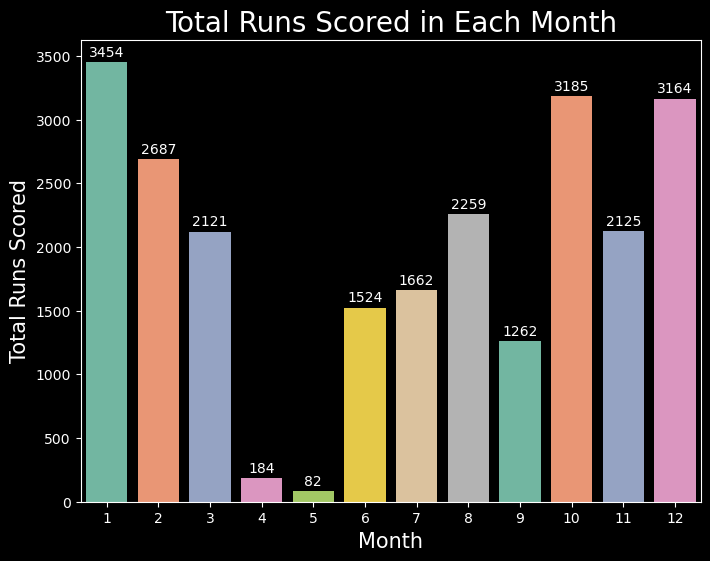

In [46]:
total_runs_by_month = df.groupby('month')['runs'].sum().reset_index()

order = total_runs_by_month['month'].sort_values().unique()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='month', y='runs', data=total_runs_by_month, order=order, palette='Set2')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Runs Scored', fontsize=15)
plt.title('Total Runs Scored in Each Month', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Number of Matches in each Year

In [47]:
df['year'].value_counts().head()

2017    52
2011    47
2014    47
2018    47
2012    46
Name: year, dtype: int64

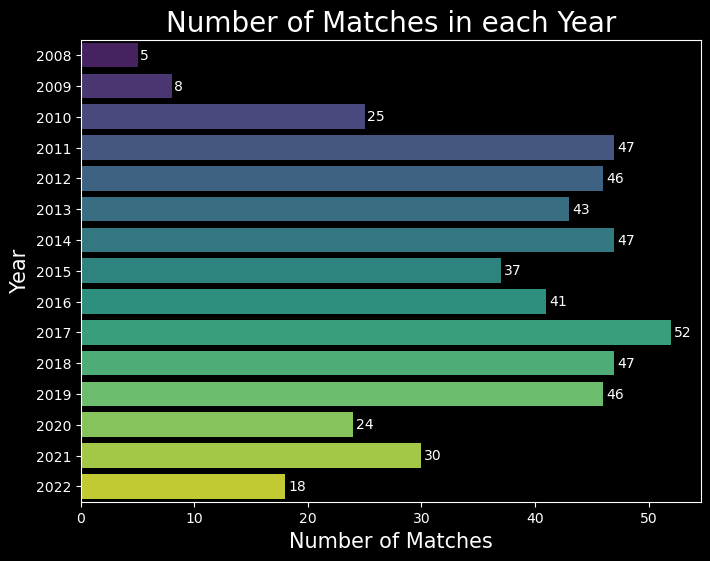

In [48]:
order = df['year'].value_counts().sort_index().index
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, y='year', order=order, palette = 'viridis')
plt.ylabel('Year', fontsize=15)
plt.xlabel('Number of Matches', fontsize=15)
plt.title('Number of Matches in each Year', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

* Virat Kohli has played majority of the matches in years of 2011-2019
* As we know that Virat Kohli was a part of WC2011 hence he got more opportunities from that year
* During Covid phase 2020-2022 very less cricket matches happend acorss the world

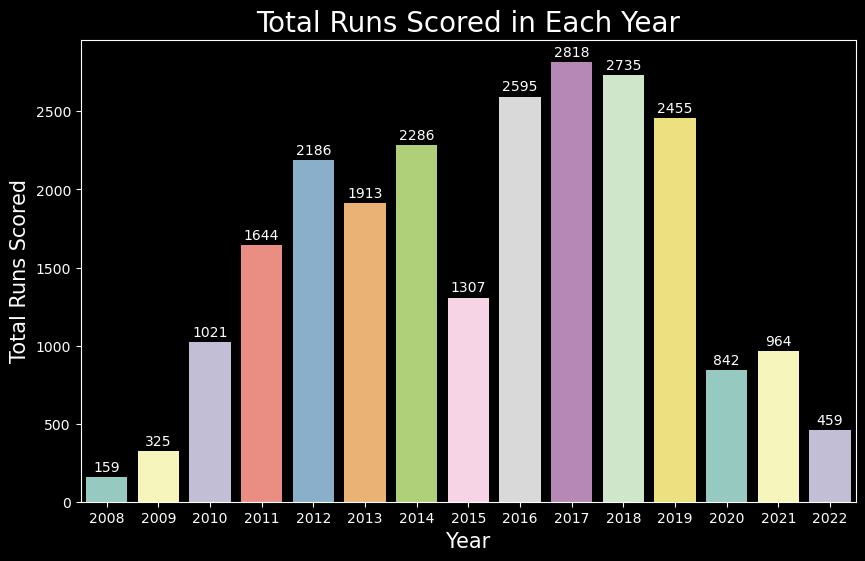

In [49]:
total_runs_by_year = df.groupby('year')['runs'].sum().reset_index()

order = total_runs_by_year['year'].sort_values().unique()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='runs', data=total_runs_by_year, order=order, palette='Set3')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Runs Scored', fontsize=15)
plt.title('Total Runs Scored in Each Year', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Matches Home vs Away

In [50]:
df['venue'].value_counts()

Away    309
Home    207
Name: venue, dtype: int64

(-1.099998605490905,
 1.0999918337707972,
 -1.0999990787579714,
 1.099999956131332)

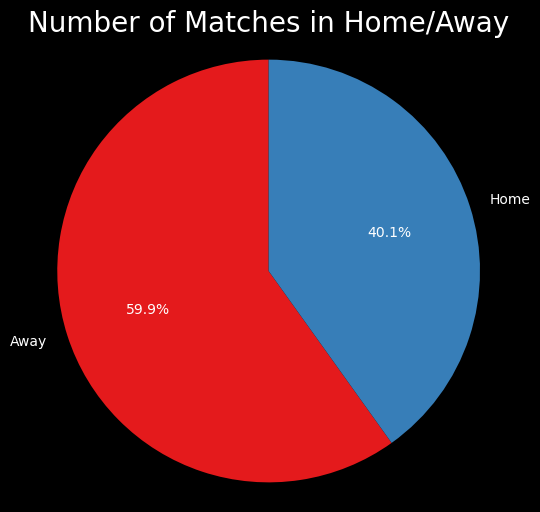

In [51]:
venue_counts = df['venue'].value_counts()
order = venue_counts.index
plt.figure(figsize=(6, 6))
plt.pie(venue_counts, labels=order, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1', n_colors=len(format_counts)))
plt.title('Number of Matches in Home/Away', fontsize=20)
plt.axis('equal')

Virat Kohli has played almost 60% of the matches outside of India

#### Distribution of Total Runs Scored in Home vs. Away Matches

(-1.0999920568180628,
 1.0999986405142053,
 -1.0999999853796156,
 1.0999999993037912)

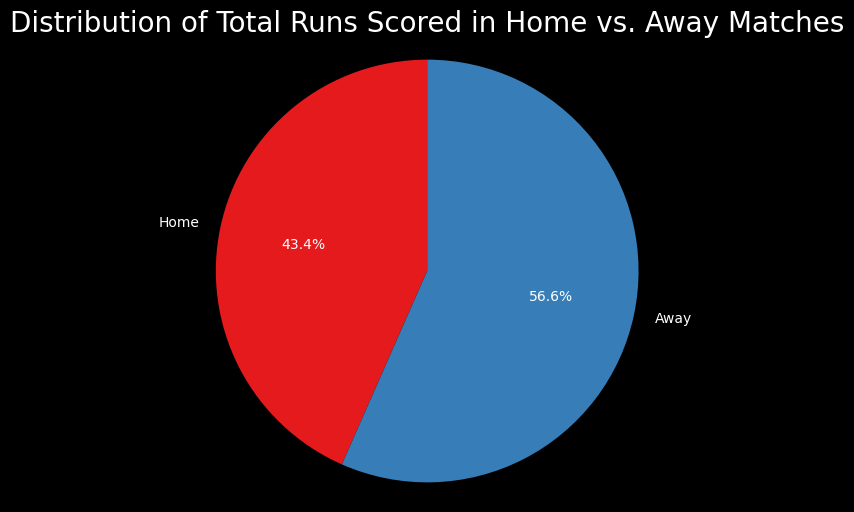

In [52]:
total_runs_by_venue = df.groupby('venue')['runs'].sum()


home_runs = total_runs_by_venue['Home']
away_runs = total_runs_by_venue.sum() - home_runs

labels = ['Home', 'Away']
sizes = [home_runs, away_runs]
colors = sns.color_palette('Set1', n_colors=len(labels))

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Total Runs Scored in Home vs. Away Matches', fontsize=20)
plt.axis('equal')

Virat Kohli has scored almost 56.6% of the runs outside of India

#### Top 5 Grounds with Highest Number of Matches

In [53]:
top_grounds = df['ground'].value_counts().head(5)
top_grounds

Mirpur       23
Kolkata      18
Ahmedabad    17
Sydney       17
Bengaluru    17
Name: ground, dtype: int64

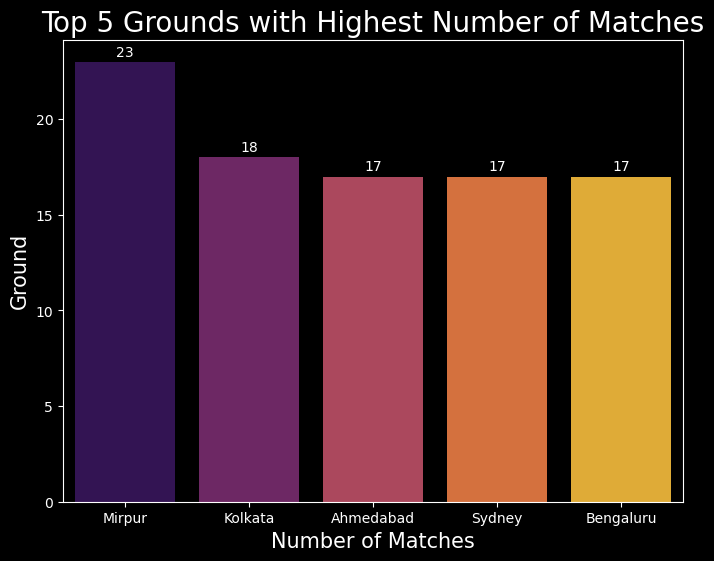

In [54]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(y=top_grounds.values, x=top_grounds.index, palette='inferno')
plt.xlabel('Number of Matches', fontsize=15)
plt.ylabel('Ground', fontsize=15)
plt.title('Top 5 Grounds with Highest Number of Matches', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

* Virat Kohli has played total 23 matches in Mirpur(Bangladesh) which is the highest number of matches he had played in any ground across the world
* As we know that Bnagladesh had hosted WC and Asia cup in these years and Bangladesh has very less grounds for cricket hence this number justifies it

#### Top 5 Grounds with Highest Total Runs

In [55]:
total_runs_by_ground = df.groupby('ground')['runs'].sum().sort_values(ascending=False).head(5)
total_runs_by_ground

ground
Mirpur           1258
Wankhede          931
Visakhapatnam     879
Adelaide          843
Kolkata           788
Name: runs, dtype: int64

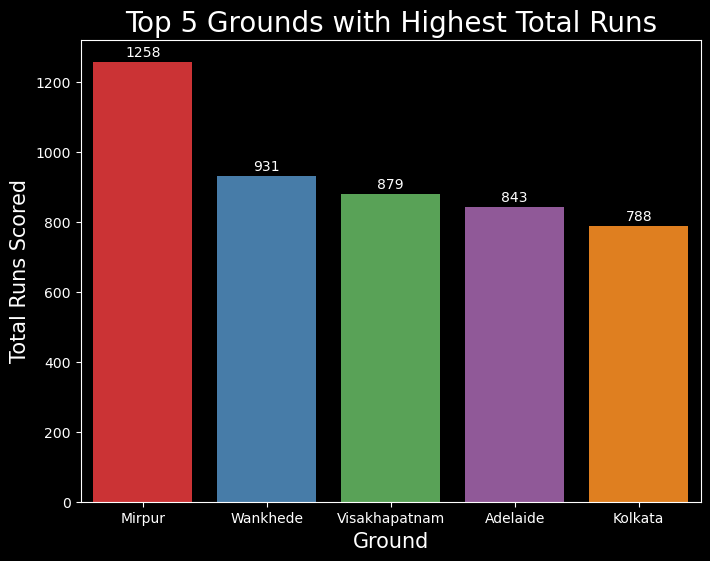

In [56]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(y=total_runs_by_ground.values, x=total_runs_by_ground.index, palette='Set1')
plt.xlabel('Ground', fontsize=15)
plt.ylabel('Total Runs Scored', fontsize=15)
plt.title('Top 5 Grounds with Highest Total Runs', fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Top 5 Test cricket innings of Virat Kohli

In [57]:
test_format_data = df[df['format'] == 'Test']
top_runs_test = test_format_data.sort_values(by='runs', ascending=False).head(5)
top_runs_test

,match,runs,opponent,ground,date,format,total,day,month,year,country,venue
434,435,254,SouthAfrica,Pune,10Oct2019,Test,21024,10,10,2019,India,Home
349,350,243,SriLanka,Delhi,2Dec2017,Test,16204,2,12,2017,India,Home
297,298,235,England,Wankhede,8Dec2016,Test,13421,8,12,2016,India,Home
348,349,213,SriLanka,Nagpur,24Nov2017,Test,15961,24,11,2017,India,Home
284,285,211,NewZealand,Indore,8Oct2016,Test,12406,8,10,2016,India,Home


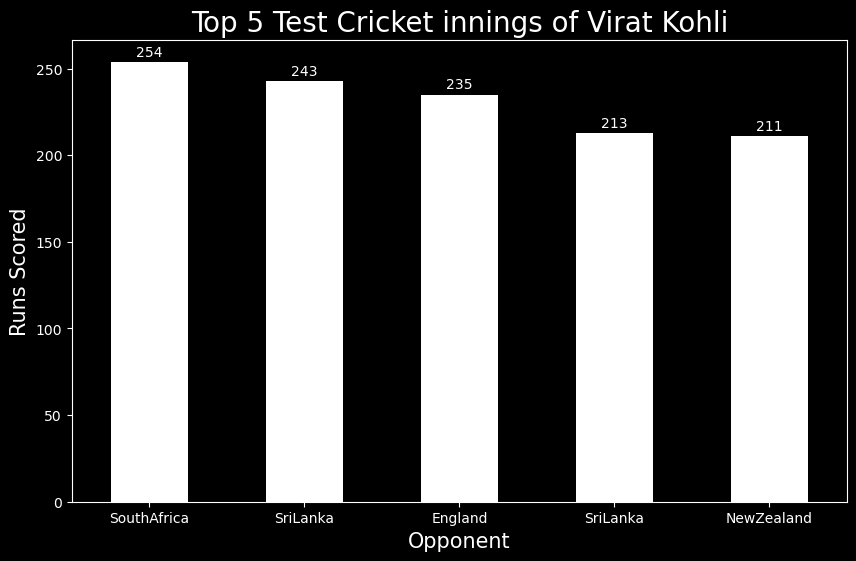

In [58]:
ax = top_runs_test.plot(kind='bar', x='opponent', y='runs', color='white', figsize=(10, 6))
plt.xlabel('Opponent', fontsize = 15)
plt.ylabel('Runs Scored', fontsize = 15)
plt.title('Top 5 Test Cricket innings of Virat Kohli', fontsize=20)
plt.xticks(rotation=0)
ax.legend().set_visible(False)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Top 5 ODI cricket innings of Virat Kohli

In [59]:
odi_format_data = df[df['format'] == 'ODI']
top_runs_odi = odi_format_data.sort_values(by='runs', ascending=False).head(5)
top_runs_odi

,match,runs,opponent,ground,date,format,total,day,month,year,country,venue
103,104,183,Pakistan,Mirpur,18Mar2012,ODI,4221,18,3,2012,Bangladesh,Away
359,360,160,SouthAfrica,CapeTown,7Feb2018,ODI,16858,7,2,2018,South Africa,Away
386,387,157,WestIndies,Visakhapatnam,24Oct2018,ODI,18509,24,10,2018,India,Home
288,289,154,NewZealand,Mohali,23Oct2016,ODI,12671,23,10,2016,India,Home
385,386,140,WestIndies,Guwahati,21Oct2018,ODI,18352,21,10,2018,India,Home


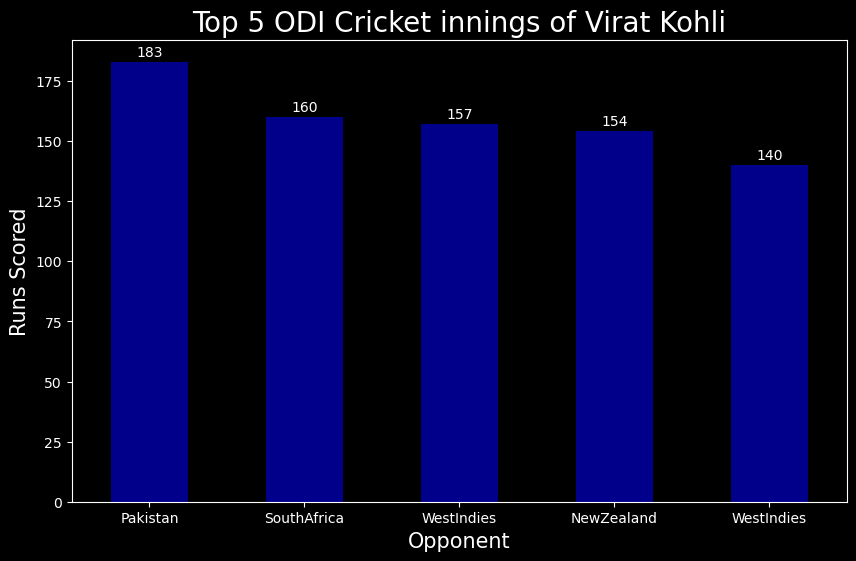

In [60]:
ax = top_runs_odi.plot(kind='bar', x='opponent', y='runs', color='darkblue', figsize=(10, 6))
plt.xlabel('Opponent', fontsize = 15)
plt.ylabel('Runs Scored', fontsize = 15)
plt.title('Top 5 ODI Cricket innings of Virat Kohli', fontsize=20)
plt.xticks(rotation=0)
ax.legend().set_visible(False)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Top 5 T20 cricket innings of Virat Kohli

In [61]:
t20_format_data = df[df['format'] == 'T20']
top_runs_t20 = t20_format_data.sort_values(by='runs', ascending=False).head(5)
top_runs_t20

,match,runs,opponent,ground,date,format,total,day,month,year,country,venue
438,439,94,WestIndies,Hyderabad(Deccan),6Dec2019,T20,21266,6,12,2019,India,Home
263,264,90,Australia,Adelaide,26Jan2016,T20,11312,26,1,2016,Australia,Away
274,275,89,WestIndies,Wankhede,31Mar2016,T20,11847,31,3,2016,India,Home
465,466,85,Australia,Sydney,8Dec2020,T20,22208,8,12,2020,Australia,Away
332,333,82,SriLanka,Colombo(RPS),6Sep2017,T20,15075,6,9,2017,Sri Lanka,Away


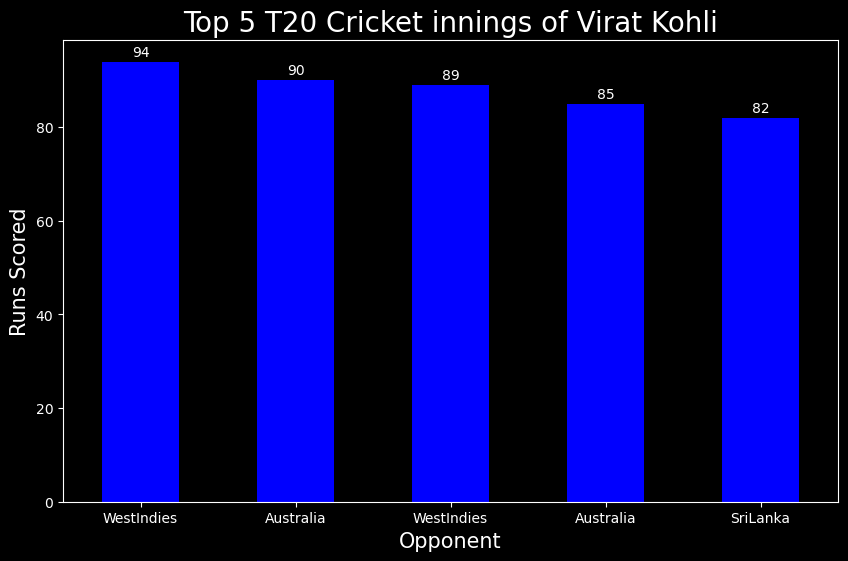

In [62]:
ax = top_runs_t20.plot(kind='bar', x='opponent', y='runs', color='blue', figsize=(10, 6))
plt.xlabel('Opponent', fontsize = 15)
plt.ylabel('Runs Scored', fontsize = 15)
plt.title('Top 5 T20 Cricket innings of Virat Kohli', fontsize=20)
plt.xticks(rotation=0)
ax.legend().set_visible(False)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

### Insights

####  Virat Kohli's Career Overview:
* Virat Kohli has participated in a total of 516 matches.
* He has scored a total of 23,709 runs.
   
####  Runs Breakdown:
* He has scored 32 ducks, 192 fifties, 70 centuries, 14 scores over 150, and 7 scores over 200.

####  Opponent and Matches Played:
* Virat Kohli has played the most matches against England (103) and Australia (95).
* He has played 23 matches in Mirpur (Bangladesh), the highest number on a single ground.

####  Runs Against Specific Opponents:
* He has scored the highest number of runs (4,483) against Australia across all formats.
* His highest individual score in Tests is 254 against South Africa.
* His highest individual score in ODIs is 183 against Pakistan.
* His highest individual score in T20Is is 94 against West Indies.

####  Performance in Different Formats and Periods:
* He has played around 49% of his matches in the ODI format, contributing to approximately 52% of his total runs.
* His golden years of scoring were between 2016 and 2019.
* During the COVID-19 phase (2020-2022), there were fewer cricket matches played worldwide.

####  Venue and Month Considerations:
* Virat Kohli has played a significant number of matches in Mirpur, Bangladesh, likely due to hosting events like the   World Cup and Asia Cup.
* His performance in the months of April and May (IPL season) shows fewer international matches.

####  International and Away Performance:
* He has played approximately 60% of his matches outside of India and has scored around 56.6% of his runs in those matches.


##### These conclusions provide insights into Virat Kohli's cricket career, his performances against specific opponents, his achievements in various formats, and the impact of external factors like events and global cricket schedules.